# Part 1: Train a CNN model

# Step 1: Load the dataset

In [106]:
import tensorflow as tf

# Path to the directory where your images are stored
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/old"

# Load the dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',  # Automatically label images based on directory names
    label_mode='int',   # Labels are returned as integers (for categorical labels, use 'categorical')
    class_names=None,   # Automatically infer class names from subdirectory names
    color_mode='grayscale',   # Load images in RGB mode
    batch_size=32,      # Number of images to return in each batch
    image_size=(100,50),  # Resize images to this size
    shuffle=True,       # Shuffle the images
    seed=12,          # Random seed for shuffling and transformations
    validation_split=None,  # Optional float between 0 and 1, fraction of data to reserve for validation
    subset=None,        # One of "training" or "validation" (requires `validation_split`)
    #interpolation='bilinear',  # Resampling method used to resize images
    follow_links=False, # Follow symlinks inside class subdirectories (False by default)
    crop_to_aspect_ratio=False, # If True, resize images without aspect ratio distortion
)

# Now `dataset` is a `tf.data.Dataset` object that yields batches of images and labels


Found 18641 files belonging to 4 classes.


In [107]:
for images, labels in dataset.take(1):  # Take 1 batch
    print(images.shape)  # Expected shape: (batch_size, 100, 50, 1) 
    print(images[1,:,1,-1]) 
    print(labels)

(32, 100, 50, 1)
tf.Tensor(
[185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185.
 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185.
 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 184. 184.
 184. 184. 184. 184. 184. 184. 184. 182. 182. 184. 183. 181. 181. 183.
 182. 177. 135. 113. 110. 105. 112. 114. 115. 108. 110. 113. 110. 111.
 116. 116. 119. 123. 154. 184. 187. 183. 185. 182. 185. 185. 185. 185.
 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185. 185.
 185. 185.], shape=(100,), dtype=float32)
tf.Tensor([3 1 3 1 3 0 3 0 0 3 0 3 2 1 0 3 1 1 3 3 0 0 0 0 2 2 3 0 1 2 3 0], shape=(32,), dtype=int32)


## Step 1-1: Normalize the data

In [3]:
# Normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

dataset = dataset.map(lambda x, y: (normalization_layer(x), y))


In [4]:
for images, labels in dataset.take(1):  # Take 1 batch
    print(images.shape)  # Expected shape: (batch_size, 100, 50, 1) 
    print(images[1,:,1,-1]) 
    print(labels)

(32, 100, 50, 1)
tf.Tensor(
[0.74509805 0.69803923 0.74509805 0.7176471  0.7568628  0.7058824
 0.75294125 0.73333335 0.76470596 0.7568628  0.74509805 0.73333335
 0.72156864 0.70980394 0.69411767 0.6862745  0.73333335 0.7019608
 0.7137255  0.7411765  0.7176471  0.7019608  0.70980394 0.72156864
 0.70980394 0.7568628  0.76470596 0.7411765  0.73333335 0.7294118
 0.73333335 0.75294125 0.68235296 0.70980394 0.70980394 0.654902
 0.6431373  0.7294118  0.7490196  0.65882355 0.69803923 0.6156863
 0.58431375 0.64705884 0.6862745  0.64705884 0.6039216  0.59607846
 0.6039216  0.61960787 0.61960787 0.59607846 0.59607846 0.6117647
 0.6        0.5686275  0.56078434 0.49803925 0.5019608  0.53333336
 0.5294118  0.54901963 0.6117647  0.64705884 0.6745098  0.7019608
 0.73333335 0.74509805 0.7490196  0.7411765  0.7294118  0.7176471
 0.70980394 0.6901961  0.7254902  0.69803923 0.73333335 0.7490196
 0.6862745  0.75294125 0.6862745  0.74509805 0.7254902  0.68235296
 0.7058824  0.7176471  0.6901961  0.6862745 

# Step 2: Split the dataste into training, validation and test dataset


In [1]:
def split_dataset(dataset, train_size=0.7, val_size=0.2, test_size=0.1, shuffle=False):
    assert abs((train_size + val_size + test_size) - 1) < 1e-6, "The sum of split sizes must be 1"
    
    # Calculate sizes
    dataset_size = len(dataset)
    train_size = int(train_size * dataset_size)
    val_size = int(val_size * dataset_size)
    
    # Split the dataset
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size)
    
    return train_dataset, val_dataset, test_dataset



In [10]:
train_dataset, val_dataset, test_dataset = split_dataset(dataset)

In [11]:
for images, labels in train_dataset.take(1):  # Take 1 batch
    print(images.shape)  # Expected shape: (batch_size, 100, 50, 1) 
    print(images[1,:,1,-1]) 
    print(labels)

(32, 100, 50, 1)
tf.Tensor(
[0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.72156864
 0.7019608  0.6666667  0.6392157  0.63529414 0.63529414 0.627451
 0.61960787 0.6431373  0.6313726  0.654902   0.72156864 0.7372549
 0.7176471  0.7372549  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7254902  0.7254902
 0.7254902  0.7254902  0.7254902  0.7254902  0.7

# Step 3: Build a CNN model with three convolutional layers, three maxPooling layers and flatten layer and two dense layers.

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape
input_shape = (100, 50,1)  # Grayscale images, height=100, width=50

# Create the model
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 2
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
        # Convolutional layer 2
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    
    # Flattening the 3D output to 1D
    layers.Flatten(),
    
    # Dense layer
    layers.Dense(64, activation='relu'),
    
    # Output layer with 5 units (for 5 categories)
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 48, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 22, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 9, 32)         9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 3, 32)          0

In [13]:
# Fit the model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# Add callbacks to the fit function
history_cnn_v1 = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stopping, model_checkpoint])


Epoch 1/50


2024-03-25 09:54:14.749100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-03-25 09:54:15.023492: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-25 09:54:15.679631: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f685c05d3a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-25 09:54:15.679661: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A2000 Laptop GPU, Compute Capability 8.6
2024-03-25 09:54:15.683638: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-25 09:54:15.762126: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


408/408 [==============================] - 21s 45ms/step - loss: 0.8483 - accuracy: 0.6353 - val_loss: 0.4919 - val_accuracy: 0.8438
Epoch 2/50
  1/408 [..............................] - ETA: 52s - loss: 0.5964 - accuracy: 0.7500

/home/yongcui/anaconda3/envs/py31/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


408/408 [==============================] - 11s 26ms/step - loss: 0.3529 - accuracy: 0.8759 - val_loss: 0.2187 - val_accuracy: 0.9372
Epoch 3/50
408/408 [==============================] - 11s 26ms/step - loss: 0.1897 - accuracy: 0.9380 - val_loss: 0.1220 - val_accuracy: 0.9582
Epoch 4/50
408/408 [==============================] - 11s 27ms/step - loss: 0.1230 - accuracy: 0.9619 - val_loss: 0.1363 - val_accuracy: 0.9510
Epoch 5/50
408/408 [==============================] - 11s 27ms/step - loss: 0.1027 - accuracy: 0.9689 - val_loss: 0.0747 - val_accuracy: 0.9768
Epoch 6/50
408/408 [==============================] - 12s 28ms/step - loss: 0.0777 - accuracy: 0.9780 - val_loss: 0.0548 - val_accuracy: 0.9852
Epoch 7/50
408/408 [==============================] - 11s 28ms/step - loss: 0.0644 - accuracy: 0.9808 - val_loss: 0.0543 - val_accuracy: 0.9836
Epoch 8/50
408/408 [==============================] - 12s 28ms/step - loss: 0.0617 - accuracy: 0.9815 - val_loss: 0.0520 - val_accuracy: 0.9865
Epo

## Step 3-1: Save the history

In [61]:
import pandas as pd

# Convert the history dictionary to a pandas DataFrame
history_df = pd.DataFrame(history_cnn_v1.history)

# Save the DataFrame to a CSV file
history_df.to_csv('history_CNN_V1.csv', index=False)


## Step 3-2: Visualize the learning process

In [52]:
## Define a function to plot the history
import pandas as pd
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation loss and accuracy from a Keras history object.

    Parameters:
    - history: The history callback returned from fitting a Keras model.
    """
    # Convert history into a DataFrame
    history_df = pd.DataFrame(history.history)

    # Creating the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Epoch', fontsize=20)
    ax1.set_ylabel('Loss', color=color, fontsize=20)
    lns1 = ax1.plot(history_df['loss'], label='Train Loss', color=color, linewidth=3)
    lns2 = ax1.plot(history_df['val_loss'], label='Validation Loss', color='tab:orange', linewidth=3)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=16)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color, fontsize=20)
    lns3 = ax2.plot(history_df['accuracy'], label='Train Accuracy', color=color, linestyle='--', linewidth=3)
    lns4 = ax2.plot(history_df['val_accuracy'], label='Validation Accuracy', color='tab:green', linestyle='--', linewidth=3)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=16)
    ax1.tick_params(axis='x', labelsize=16)

    # Combine all the legends
    lns = lns1 + lns2 + lns3 + lns4
    labs = [l.get_label() for l in lns]
    # Move the legend a bit lower
    ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize=12, ncol=2)

    plt.title('Training and Validation Loss and Accuracy', fontsize=20)
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()


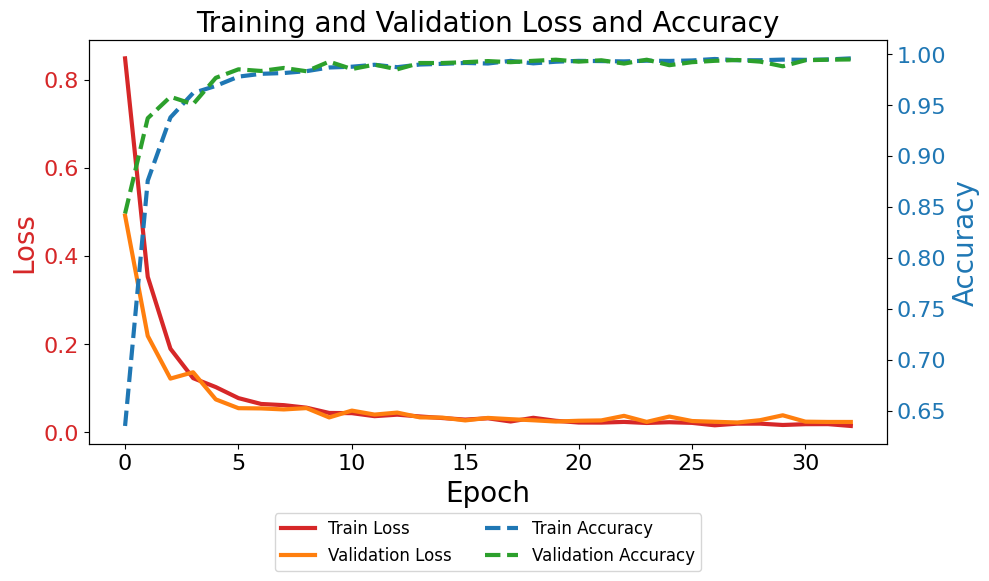

In [16]:
plot_training_history(history_cnn_v1)

# Step 4 Model evaluation and testing

## Step 4-1: Evaluate the model on testing dataset

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

59/59 [==============================] - 10s 25ms/step - loss: 0.0409 - accuracy: 0.9915
Test loss: 0.040907472372055054, Test accuracy: 0.9914575815200806


In [22]:
model.save('CNN_model_v1.keras')


## Step 4-2: Test the model on a sequence of data of a welding trial

In [23]:
from tensorflow.keras.models import load_model
CNN_model_v1 = load_model('CNN_model_v1.keras')
CNN_model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 48, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 22, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 9, 32)         9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 3, 32)          0

### Step 4-2-1: Define a function to load images in a folder

In [12]:
##Define a function to load images in a folder

import tensorflow as tf
import os
import numpy as np

def load_and_preprocess_images(directory, image_size=(100, 50), batch_size=32, image_channels=1):
    """
    Load and preprocess images from a specified directory.

    Parameters:
    - directory (str): The path to the directory containing image files.
    - image_size (tuple of int): The target size for the images as (height, width).
    - batch_size (int): The size of the batches in which the images will be grouped.
    - image_channels (int): The number of color channels in the images (1 for grayscale, 3 for RGB).

    Returns:
    - A tf.data.Dataset object containing the loaded and preprocessed images.
    """
    # Get a list of image file paths
    file_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if fname.endswith('.jpg')]

    # Sort the file paths numerically
    file_paths = sorted(file_paths, key=lambda x: int(os.path.split(x)[-1].split('.')[0]))

    def process_path(file_path):
        """
        Load and preprocess a single image.
        """
        # Load the raw data from the file as a string
        img = tf.io.read_file(file_path)
        # Decode the image into a dense tensor
        img = tf.image.decode_jpeg(img, channels=image_channels)
        # Resize the image to the desired size
        return tf.image.resize(img, image_size)

    # Create a dataset of sorted file paths
    path_ds = tf.data.Dataset.from_tensor_slices(file_paths)

    # Apply the `process_path` function to each item in the dataset
    image_ds = path_ds.map(process_path)

    # Group the images into batches
    image_ds = image_ds.batch(batch_size)

    return image_ds

### Step: 4-2-2: Load and test on the first sequence 

In [65]:
# load the unseen sequence 1: which is full recording for one welding trial
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/sequenceTest_RefC2_230906"
image_ds = load_and_preprocess_images(directory, image_size=(100, 50), batch_size=32, image_channels=1)

In [66]:

# Apply the normalization to the dataset
normalized_image_ds = image_ds.map(lambda x: normalization_layer(x))

In [67]:

# Predict using the model
predictions = CNN_model_v1.predict(normalized_image_ds)

# If your model outputs class probabilities, you might want to convert these to class labels
predicted_classes = tf.argmax(predictions, axis=1)

11/11 [==============================] - 1s 40ms/step


In [68]:
print(predicted_classes)

tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 1 1
 1 2 1 2 2 1 2 2 1 1 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 0 0 0 0 0 0 0 0 0 0 0 0], shape=(345,), dtype=int64)


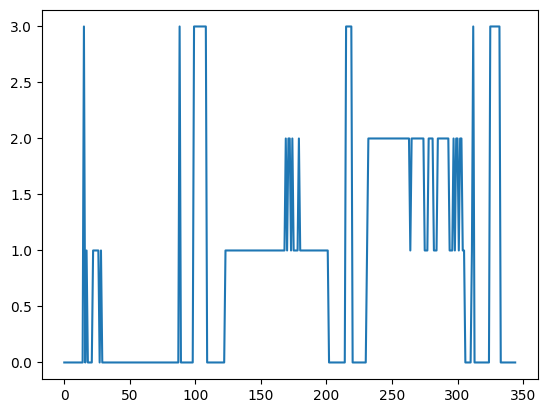

In [69]:
import matplotlib.pyplot as plt
plt.plot(predicted_classes)

### Step: 4-2-3: Load and test on the second sequence, which has different step-wise gap width ranges as the other data

In [71]:
# load the unseen sequence 2: which is full recording for one welding trial
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/sequenceTest_C_230908_1125"
image_ds = load_and_preprocess_images(directory, image_size=(100, 50), batch_size=32, image_channels=1)

In [72]:
# Apply the normalization to the dataset
normalized_image_ds = image_ds.map(lambda x: normalization_layer(x))

In [73]:
# Predict using the model
predictions = CNN_model_v1.predict(normalized_image_ds)

# If your model outputs class probabilities, you might want to convert these to class labels
predicted_classes = tf.argmax(predictions, axis=1)

11/11 [==============================] - 1s 39ms/step


tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3
 3 3 3 0 0 0 0 0 0 1 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 1 2 2 2 2 1 2 2 2 2 1
 1 2 1 1 1 1 1 3 1 3 1 2 3 3 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 2 2 1 2 1
 2 2 2 2 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 3 3 0 0
 0 0 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 3 3 3 3 0 0 3 3 3 3 3 3
 3], shape=(334,), dtype=int64)


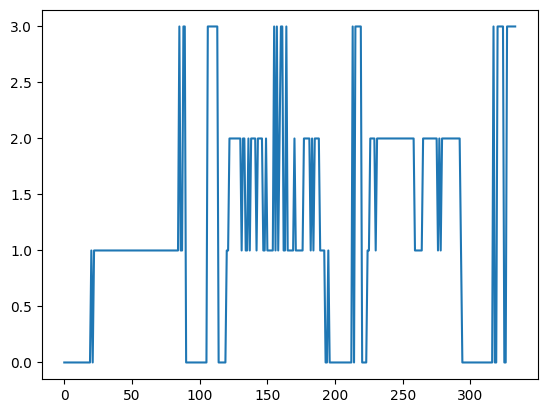

In [74]:
print(predicted_classes)
import matplotlib.pyplot as plt
plt.plot(predicted_classes)

# ----------------------------------------------
# --------------------------------------------------------------------------------
# Part 2: Train a RNN model

# Step 1: Dataset preparation

## Step 1-1: Load the dataset without shuffle

In [76]:
# The data should not be shuffled
import tensorflow as tf

# Path to the directory where your images are stored
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/old"

# Load the dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',  # Automatically label images based on directory names
    label_mode='int',   # Labels are returned as integers (for categorical labels, use 'categorical')
    class_names=None,   # Automatically infer class names from subdirectory names
    color_mode='grayscale',   # Load images in RGB mode
    batch_size=32,      # Number of images to return in each batch
    image_size=(100,50),  # Resize images to this size
    shuffle=None,       # Shuffle the images
    seed=12,          # Random seed for shuffling and transformations
    validation_split=None,  # Optional float between 0 and 1, fraction of data to reserve for validation
    subset=None,        # One of "training" or "validation" (requires `validation_split`)
    #interpolation='bilinear',  # Resampling method used to resize images
    follow_links=False, # Follow symlinks inside class subdirectories (False by default)
    crop_to_aspect_ratio=False, # If True, resize images without aspect ratio distortion
)

# Now `dataset` is a `tf.data.Dataset` object that yields batches of images and labels


Found 18641 files belonging to 4 classes.


## Step 1-2: Convert dataset to numpy array for pca

In [84]:
#Define a function to convert tensorflow dataset to numpy array
import numpy as np
import tensorflow as tf

def process_dataset_to_numpy(dataset):
    """
    Processes a TensorFlow dataset into flattened numpy arrays for images and labels.

    Parameters:
    - dataset: A tf.data.Dataset object containing tuples of (images, labels).

    Returns:
    - image_matrix: A numpy array of shape (total_images, flattened_image_size).
    - labels_vec: A numpy array containing all labels.
    """
    # Initialize lists to collect batches
    batch_images = []
    batch_labels = []

    # Iterate over each batch in the dataset
    for img_batch, label_batch in dataset:
        # Normalize the batch of images if not already normalized
        img_batch_np = img_batch.numpy() / 255.0

        # Collect batches
        batch_images.append(img_batch_np.reshape(img_batch_np.shape[0], -1))  # Flatten images
        batch_labels.append(label_batch.numpy())

    # Concatenate all batches
    image_matrix = np.concatenate(batch_images, axis=0)
    labels_vec = np.concatenate(batch_labels, axis=0)

    return image_matrix, labels_vec


In [79]:
# Convert the dataset to numpy array
image_matrix, labels_vec = process_dataset_to_numpy(dataset)

In [80]:
print(image_matrix.shape, labels_vec.shape)

(18641, 5000) (18641,)


# Step 2: Apply PCA

In [40]:
from sklearn.decomposition import PCA

# Choose the number of components or the variance ratio threshold
n_components = 0.95  # keep 95% of variance

pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(image_matrix)

# pca_result now contains the transformed dataset

In [41]:
print(pca_result.shape)

(18641, 197)


# Step 3: Split the dataset: split each class into training, validation, and test by ratio of 0.7, 0.2 and 0.1, then combined to form the three datasets

## Step 3-1: Define a function to split a dataset into three subsets

In [42]:
def split_data_with_labels(data, labels, train_ratio=0.7, val_ratio=0.2):
    """Splits data and labels into training, validation, and test sets."""
    total_length = len(data)
    train_size = int(total_length * train_ratio)
    val_size = int(total_length * val_ratio)
    
    train_data = data[:train_size]
    val_data = data[train_size:train_size + val_size]
    test_data = data[train_size + val_size:]
    
    train_labels = labels[:train_size]
    val_labels = labels[train_size:train_size + val_size]
    test_labels = labels[train_size + val_size:]
    
    return (train_data, train_labels), (val_data, val_labels), (test_data, test_labels)


## Step 3-2: Based on the index range of the classes, extract each class and then use the defined data splitting function to split data of the class into three subsets, forming the train, validation and test dtasets

In [43]:
index_ranges  = [(0, 5443), (5443, 9503), (9503, 12713), (12713, 18641)]
all_train, all_val, all_test = [], [], []
for start_index, end_index in index_ranges:
    subset = pca_result[start_index:end_index]
    subset_labels = labels_vec[start_index:end_index]  # Assume labels_vec is your array of labels

    # Call the function with the subset and its labels
    (train_data, train_labels), (val_data, val_labels), (test_data, test_labels) = split_data_with_labels(subset, subset_labels, train_ratio=0.7, val_ratio=0.2)
    
    # Append the split data and labels to the respective lists
    all_train.append((train_data, train_labels))
    all_val.append((val_data, val_labels))
    all_test.append((test_data, test_labels))

In [44]:
import numpy as np

# Concatenate training data and labels
train_data = np.concatenate([x[0] for x in all_train], axis=0)
train_labels = np.concatenate([x[1] for x in all_train], axis=0)

# Concatenate validation data and labels
val_data = np.concatenate([x[0] for x in all_val], axis=0)
val_labels = np.concatenate([x[1] for x in all_val], axis=0)

# Concatenate testing data and labels
test_data = np.concatenate([x[0] for x in all_test], axis=0)
test_labels = np.concatenate([x[1] for x in all_test], axis=0)

In [45]:
print(train_labels[11000:12000])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

## Step 3-3: Convert the datasets to tensorflow dataset

In [46]:
import tensorflow as tf

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))


In [47]:
for features, labels in train_dataset.take(1):  # Take 1 batch
    print(features.shape)  # 
    print(labels.shape)  # 
    print(labels)

(197,)
()
tf.Tensor(0, shape=(), dtype=int32)


## Step 3-4: Batching and prefetching

In [48]:

batch_size=32
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


In [49]:
for images, labels in test_dataset.take(1):  # Take 1 batch
    print(images.shape)  # Expected shape: (batch_size, feature_length) 
    print(labels.shape)  # Expected shape: (batch_size,)
    print(labels)


(32, 197)
(32,)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)


## Step 3-5: Create sequence data suitable for RNN model

In [50]:
import tensorflow as tf

def create_rnn_sequences(dataset, sequence_length=3):
    # Ensure the dataset is unbatched
    dataset = dataset.unbatch()
    
    # Create sequences of images
    images_ds = dataset.map(lambda x, y: x)
    images_ds = images_ds.window(size=sequence_length, shift=1, drop_remainder=True)
    images_ds = images_ds.flat_map(lambda w: w.batch(sequence_length))
    
    # Create sequences of labels, aligning the last label with the image sequences
    labels_ds = dataset.map(lambda x, y: y)
    labels_ds = labels_ds.window(size=sequence_length, shift=1, drop_remainder=True)
    labels_ds = labels_ds.flat_map(lambda w: w.batch(sequence_length))
    labels_ds = labels_ds.map(lambda x: x[-1])
    
    # Combine the images and labels into sequences
    dataset = tf.data.Dataset.zip((images_ds, labels_ds))
    
    return dataset

# Apply the transformation
sequence_length = 3
train_dataset_rnn = create_rnn_sequences(train_dataset, sequence_length=sequence_length)
val_dataset_rnn = create_rnn_sequences(val_dataset, sequence_length=sequence_length)
test_dataset_rnn = create_rnn_sequences(test_dataset, sequence_length=sequence_length)
# Verify the output
for images_seq, label in train_dataset_rnn.take(1):
    print("Sequence shape:", images_seq.shape)  # 
    print("Label:", label.numpy())


Sequence shape: (3, 197)
Label: 0


In [51]:
# The memory is limited, so batch size 16 is selected
batch_size=16
train_dataset_rnn = train_dataset_rnn.batch(batch_size)
val_dataset_rnn = val_dataset_rnn.batch(batch_size)
test_dataset_rnn = test_dataset_rnn.batch(batch_size)

train_dataset_rnn = train_dataset_rnn.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset_rnn = val_dataset_rnn.prefetch(tf.data.experimental.AUTOTUNE)
test_dataset_rnn = test_dataset_rnn.prefetch(tf.data.experimental.AUTOTUNE)

In [52]:
for images_seq, label in val_dataset_rnn.take(1):
    print("Sequence shape:", images_seq.shape)  # Expected: (batch_size, sequence_length, number_of_features)
    print("Label:", label[0].numpy())
   # print("Label:", images_seq[0,0,:,:])

Sequence shape: (16, 3, 197)
Label: 0


# Step 4: Build a simple RNN model

In [57]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense,SimpleRNN, LayerNormalization
# Assuming flattened images and `sequence_length` is the number of images per sequence
# and `feature_size` is the flattened image size (e.g., 100*50 for 100x50 images)
sequence_length = 3
feature_size = 197

model_rnn = models.Sequential([
    # This layer might reshape flattened sequences into a 3D structure expected by RNN
    layers.Reshape((sequence_length, feature_size), input_shape=(sequence_length * feature_size,)),
    
    # RNN layer
    layers.SimpleRNN(64, return_sequences=True),
    LayerNormalization(),
    layers.SimpleRNN(32, return_sequences=False),
    
    # Output layer, adjust units based on your specific task
    layers.Dense(4, activation='sigmoid')  # Example for binary classification
])

model_rnn.summary()
# Compile the model
model_rnn.compile(
    optimizer='adam',  # Adam optimizer is a common choice
    loss='sparse_categorical_crossentropy',  # Use this if your labels are integer class labels
    # loss='categorical_crossentropy',  # Use this if your labels are one-hot encoded
    metrics=['accuracy']  # Track accuracy metric
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 3, 197)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 3, 64)             16768     
                                                                 
 layer_normalization_1 (Lay  (None, 3, 64)             128       
 erNormalization)                                                
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 20132 (78.64 KB)
Trainable params: 20132 (78.64 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

# Step 5: RNN model training

In [58]:
num_epochs=100
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,         # How many epochs to wait after min has been hit
    verbose=1,           # Log when stops
    mode='min',          # 'min' means we are monitoring 'val_loss' to decrease
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
)

history_rnn = model_rnn.fit(train_dataset_rnn, epochs=num_epochs, validation_data=val_dataset_rnn,callbacks=[early_stopping])

Epoch 1/100
816/816 [==============================] - 17s 19ms/step - loss: 0.1966 - accuracy: 0.9493 - val_loss: 1.8581 - val_accuracy: 0.4693
Epoch 2/100
  7/816 [..............................] - ETA: 15s - loss: 3.2648 - accuracy: 0.2411    

2024-03-25 10:28:02.599040: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7176755819788077983
2024-03-25 10:28:02.599078: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1395974629754793431
2024-03-25 10:28:02.599104: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1821135718681098668


816/816 [==============================] - 16s 19ms/step - loss: 0.1694 - accuracy: 0.9531 - val_loss: 2.2406 - val_accuracy: 0.4647
Epoch 3/100
816/816 [==============================] - 16s 19ms/step - loss: 0.1219 - accuracy: 0.9673 - val_loss: 2.1857 - val_accuracy: 0.4891
Epoch 4/100
816/816 [==============================] - 16s 20ms/step - loss: 0.0997 - accuracy: 0.9688 - val_loss: 2.0760 - val_accuracy: 0.4730
Epoch 5/100
816/816 [==============================] - 16s 19ms/step - loss: 0.1142 - accuracy: 0.9611 - val_loss: 2.4245 - val_accuracy: 0.4854
Epoch 6/100
816/816 [==============================] - 16s 19ms/step - loss: 0.1177 - accuracy: 0.9619 - val_loss: 2.1140 - val_accuracy: 0.4870
Epoch 7/100
816/816 [==============================] - 16s 19ms/step - loss: 0.1048 - accuracy: 0.9627 - val_loss: 2.2632 - val_accuracy: 0.4875
Epoch 8/100
816/816 [==============================] - 16s 20ms/step - loss: 0.1135 - accuracy: 0.9637 - val_loss: 2.1640 - val_accuracy: 0.52

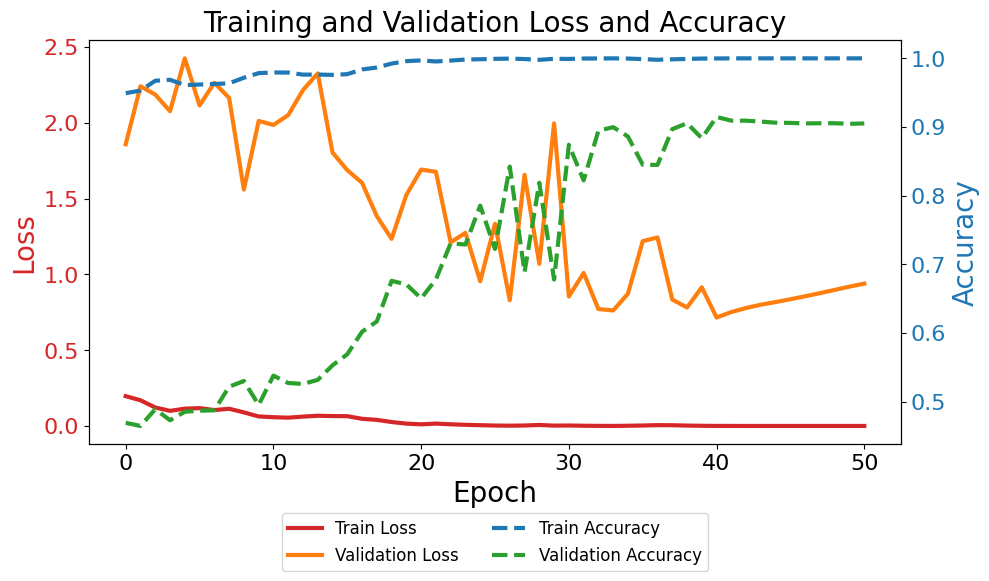

In [60]:
import pandas as pd

# Convert the history dictionary to a pandas DataFrame
history_df = pd.DataFrame(history_rnn.history)

# Save the DataFrame to a CSV file
history_df.to_csv('history_RNN_V1.csv', index=False)
plot_training_history(history_rnn)

# Step 6: RNN model evaluation and testing

## Step 6-1: Evaluate model on the test dataset, which are collected from the same welding trails as the training and validation dataset

In [62]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_rnn.evaluate(test_dataset_rnn)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

117/117 [==============================] - 1s 7ms/step - loss: 0.8519 - accuracy: 0.8975
Test loss: 0.851897120475769, Test accuracy: 0.8975321650505066


2024-03-25 10:49:41.174050: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7176755819788077983
2024-03-25 10:49:41.174086: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1395974629754793431
2024-03-25 10:49:41.174107: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1821135718681098668


In [63]:
model_rnn.save('RNN_model_v1.keras')

## Step 6-2 Test the rnn model on a data from a welding trail whoes data has not been used in training and validation

In [82]:
# load the unseen sequence 1: which is full recording for one welding trial
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/sequenceTest_RefC2_230906"
image_ds = load_and_preprocess_images(directory, image_size=(100, 50), batch_size=32, image_channels=1)

In [86]:
import numpy as np
import tensorflow as tf

def process_images_to_numpy(dataset):
    """
    Processes a TensorFlow dataset into flattened numpy arrays for images and labels.

    Parameters:
    - dataset: A tf.data.Dataset object containing tuples of (images, labels).

    Returns:
    - image_matrix: A numpy array of shape (total_images, flattened_image_size).
    - labels_vec: A numpy array containing all labels.
    """
    # Initialize lists to collect batches
    batch_images = []
 # Iterate over each batch in the dataset
    for img_batch in dataset:
        # Normalize the batch of images if not already normalized
        img_batch_np = img_batch.numpy() / 255.0

        # Collect batches
        batch_images.append(img_batch_np.reshape(img_batch_np.shape[0], -1))  # Flatten images
    # Concatenate all batches
    image_matrix = np.concatenate(batch_images, axis=0)
    return image_matrix


In [87]:
#Convert the dataset to numpy array to apply pca
image_matrix = process_images_to_numpy(image_ds)

In [88]:
seq1_pca = pca.transform(image_matrix)

In [89]:
print(seq1_pca.shape)

(345, 197)


In [92]:
import numpy as np

def create_sequences(data, sequence_length=3):
    """
    Create sequences from the data with a specified sequence length.

    Parameters:
    - data: A 2D NumPy array where each row is a timestep.
    - sequence_length: The length of the sequences to be created.

    Returns:
    - X: A 3D NumPy array of shape (number_of_sequences, sequence_length, features_per_step).
    """
    X = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:(i + sequence_length)]
        X.append(sequence)
    return np.array(X)

In [97]:
seq1_pca_rnn= create_sequences(seq1_pca, sequence_length=3)
arr_size=seq1_pca_rnn.shape
print(arr_size)

(342, 3, 197)


In [102]:
reshaped_seq1_pca_rnn = seq1_pca_rnn.reshape(arr_size[0], arr_size[1]*arr_size[2])
predictions = model_rnn.predict(reshaped_seq1_pca_rnn)

11/11 [==============================] - 0s 18ms/step


tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 3 0 1 3
 1 1 1 1 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 0 0
 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2
 2 2 2 2 2 1 2 1 3 3 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3
 0 0 0 0 0 0 0 0 0], shape=(342,), dtype=int64)


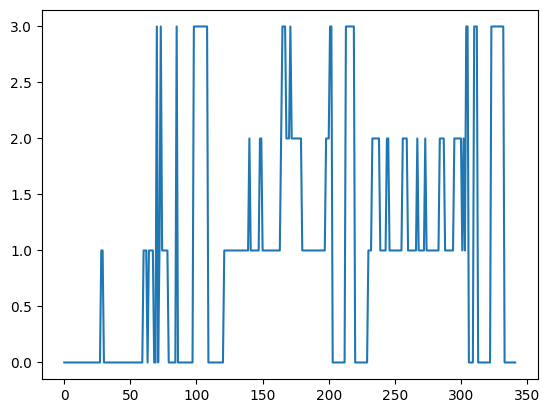

In [103]:
predicted_classes = tf.argmax(predictions, axis=1)
print(predicted_classes)
import matplotlib.pyplot as plt
plt.plot(predicted_classes)

## Step 6-3: Test the model on the unseen sequence 2 where step-wise gaps have different gap width as that in the other datasets

In [104]:
# load the unseen sequence 2: which is full recording for one welding trial
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/sequenceTest_C_230908_1125"
image_ds = load_and_preprocess_images(directory, image_size=(100, 50), batch_size=32, image_channels=1)

11/11 [==============================] - 0s 18ms/step
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3
 2 1 3 3 3 3 3 3 3 3 3 3 3 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3
 3 3 3 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 0
 0 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0 3 3 3 3 3 3], shape=(331,), dtype=int64)


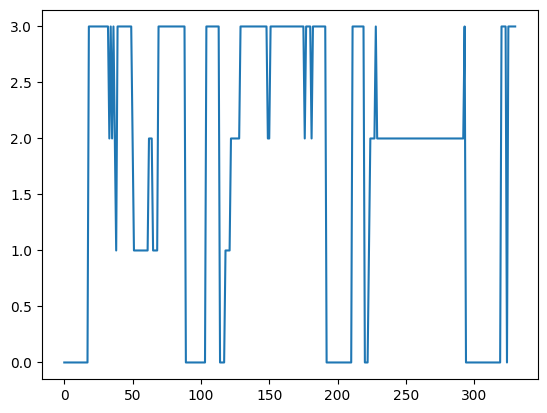

In [105]:

image_matrix = process_images_to_numpy(image_ds)
seq1_pca = pca.transform(image_matrix)
seq1_pca_rnn= create_sequences(seq1_pca, sequence_length=3)
arr_size=seq1_pca_rnn.shape
reshaped_seq1_pca_rnn = seq1_pca_rnn.reshape(arr_size[0], arr_size[1]*arr_size[2])
predictions = model_rnn.predict(reshaped_seq1_pca_rnn)
predicted_classes = tf.argmax(predictions, axis=1)
print(predicted_classes)
import matplotlib.pyplot as plt
plt.plot(predicted_classes)

# Considering the performance of the RNN model on the unseen data is not as good as the CNN model, CNN model was selected for further improving

# Part 3: Improving CNN model

In [38]:
import tensorflow as tf

# Path to the directory where your images are stored
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/old"

# Load the dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',  # Automatically label images based on directory names
    label_mode='int',   # Labels are returned as integers (for categorical labels, use 'categorical')
    class_names=None,   # Automatically infer class names from subdirectory names
    color_mode='grayscale',   # Load images in RGB mode
    batch_size=32,      # Number of images to return in each batch
    image_size=(100,50),  # Resize images to this size
    shuffle=True,       # Shuffle the images
    seed=12,          # Random seed for shuffling and transformations
    validation_split=None,  # Optional float between 0 and 1, fraction of data to reserve for validation
    subset=None,        # One of "training" or "validation" (requires `validation_split`)
    #interpolation='bilinear',  # Resampling method used to resize images
    follow_links=False, # Follow symlinks inside class subdirectories (False by default)
    crop_to_aspect_ratio=False, # If True, resize images without aspect ratio distortion
)


Found 18641 files belonging to 4 classes.


In [39]:
import tensorflow as tf

# Path to the directory where your images are stored
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/syntheticData"

# Load the dataset
synthetic_dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',  # Automatically label images based on directory names
    label_mode='int',   # Labels are returned as integers (for categorical labels, use 'categorical')
    class_names=None,   # Automatically infer class names from subdirectory names
    color_mode='grayscale',   # Load images in RGB mode
    batch_size=32,      # Number of images to return in each batch
    image_size=(100,50),  # Resize images to this size
    shuffle=True,       # Shuffle the images
    seed=12,          # Random seed for shuffling and transformations
    validation_split=None,  # Optional float between 0 and 1, fraction of data to reserve for validation
    subset=None,        # One of "training" or "validation" (requires `validation_split`)
    #interpolation='bilinear',  # Resampling method used to resize images
    follow_links=False, # Follow symlinks inside class subdirectories (False by default)
    crop_to_aspect_ratio=False, # If True, resize images without aspect ratio distortion
)

Found 9000 files belonging to 3 classes.


In [40]:
for images, labels in synthetic_dataset.take(1):  # Take 1 batch
    print(images.shape)  # Expected shape: (batch_size, 100, 50, 1) 
    print(images[1,:,1,-1]) 
    print(labels)

(32, 100, 50, 1)
tf.Tensor(
[218. 218. 218. 218. 218. 218. 218. 218. 218. 218. 218. 218. 218. 218.
 218. 218. 217. 217. 217. 217. 218. 218. 218. 218. 220. 219. 216. 215.
 215. 216. 219. 220. 213. 214. 216. 221. 216. 221.  27.  28.  26.  26.
  26.  26.  26.  26.  26.  26.  27.  27.  27.  27.  27.  27.  27.  27.
  25. 219. 214. 219. 215. 221. 214. 220. 219. 218. 217. 216. 216. 217.
 218. 218. 218. 218. 218. 219. 219. 218. 218. 218. 217. 217. 217. 217.
 217. 217. 217. 217. 214. 219. 221. 217. 215. 217. 219. 217. 218. 218.
 218. 218.], shape=(100,), dtype=float32)
tf.Tensor([0 1 1 0 1 1 2 1 1 1 0 2 1 1 2 0 2 2 2 1 1 2 0 1 2 1 2 2 1 1 1 1], shape=(32,), dtype=int32)


In [41]:
combined_dataset = dataset.concatenate(synthetic_dataset)

In [42]:
buffer_size = 10000  # Adjust based on your dataset size and available memory

combined_dataset = combined_dataset.shuffle(buffer_size)

In [43]:
# Normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

combined_dataset = combined_dataset.map(lambda x, y: (normalization_layer(x), y))

In [44]:
train_dataset, val_dataset, test_dataset = split_dataset(combined_dataset)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [46]:
for images, labels in combined_dataset.take(1):  # Take 1 batch
    print(images.shape)  # Expected shape: (batch_size, 100, 50, 1) 
    print(images[1,:,1,-1]) 
    print(labels)

(32, 100, 50, 1)
tf.Tensor(
[0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902 0.7254902
 0.7254902 0.7254902 0.7254902 0.7254902 0.725490

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, RandomFlip, RandomRotation

# Define the input shape
input_shape = (100, 50, 1)  # Grayscale images, height=100, width=50

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Create the model
cnn_model_v2 = models.Sequential([
    tf.keras.Input(shape=input_shape),
    # Convolutional layer 1
    data_augmentation,
    # Convolutional layer 1
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 2
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
        # Convolutional layer 2
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    # Dense layer
    layers.Dense(64, activation='relu'),
    
    # Output layer with 5 units (for 5 categories)
    layers.Dense(4, activation='softmax')
])

# Compile the model
cnn_model_v2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
cnn_model_v2.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 100, 50, 1)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 98, 48, 64)        640       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 49, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 47, 22, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 23, 11, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 21, 9, 32)       

In [48]:
# Fit the model
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# Add callbacks to the fit function
history_cnn_v2 = cnn_model_v2.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
605/605 [==============================] - 21s 23ms/step - loss: 0.8347 - accuracy: 0.6306 - val_loss: 0.6158 - val_accuracy: 0.7558
Epoch 2/100
605/605 [==============================] - 21s 23ms/step - loss: 0.4469 - accuracy: 0.8280 - val_loss: 0.3741 - val_accuracy: 0.8799
Epoch 3/100
605/605 [==============================] - 21s 23ms/step - loss: 0.3822 - accuracy: 0.8573 - val_loss: 0.3271 - val_accuracy: 0.8848
Epoch 4/100
604/605 [============================>.] - ETA: 0s - loss: 0.2995 - accuracy: 0.8899

2024-03-25 19:44:16.700490: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 569 of 10000
2024-03-25 19:44:23.648245: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 31s 40ms/step - loss: 0.2997 - accuracy: 0.8898 - val_loss: 0.1989 - val_accuracy: 0.9454
Epoch 5/100


2024-03-25 19:44:34.568839: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 760 of 10000


  2/605 [..............................] - ETA: 45s - loss: 0.1603 - accuracy: 0.9375    

2024-03-25 19:44:35.325966: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 25s 23ms/step - loss: 0.2190 - accuracy: 0.9244 - val_loss: 0.1826 - val_accuracy: 0.9559
Epoch 6/100
605/605 [==============================] - 21s 24ms/step - loss: 0.2061 - accuracy: 0.9271 - val_loss: 0.1564 - val_accuracy: 0.9476
Epoch 7/100
605/605 [==============================] - 21s 24ms/step - loss: 0.1570 - accuracy: 0.9479 - val_loss: 0.1290 - val_accuracy: 0.9558
Epoch 8/100
605/605 [==============================] - 24s 25ms/step - loss: 0.1484 - accuracy: 0.9488 - val_loss: 0.2166 - val_accuracy: 0.9250
Epoch 9/100
605/605 [==============================] - 24s 26ms/step - loss: 0.2284 - accuracy: 0.9227 - val_loss: 0.2057 - val_accuracy: 0.9274
Epoch 10/100
605/605 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9567

2024-03-25 19:47:00.061606: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 815 of 10000
2024-03-25 19:47:00.583597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 25s 31ms/step - loss: 0.1272 - accuracy: 0.9567 - val_loss: 0.1387 - val_accuracy: 0.9496
Epoch 11/100
604/605 [============================>.] - ETA: 0s - loss: 0.1124 - accuracy: 0.9614

2024-03-25 19:47:28.317735: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 812 of 10000
2024-03-25 19:47:28.864050: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 28s 31ms/step - loss: 0.1122 - accuracy: 0.9615 - val_loss: 0.1186 - val_accuracy: 0.9603
Epoch 12/100
605/605 [==============================] - 22s 22ms/step - loss: 0.1094 - accuracy: 0.9642 - val_loss: 0.1159 - val_accuracy: 0.9554
Epoch 13/100
605/605 [==============================] - 21s 24ms/step - loss: 0.0899 - accuracy: 0.9707 - val_loss: 0.0908 - val_accuracy: 0.9677
Epoch 14/100
605/605 [==============================] - 21s 23ms/step - loss: 0.0890 - accuracy: 0.9714 - val_loss: 0.0933 - val_accuracy: 0.9710
Epoch 15/100
605/605 [==============================] - 21s 23ms/step - loss: 0.0835 - accuracy: 0.9724 - val_loss: 0.0812 - val_accuracy: 0.9718
Epoch 16/100
603/605 [============================>.] - ETA: 0s - loss: 0.0762 - accuracy: 0.9753

2024-03-25 19:49:18.800402: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 685 of 10000
2024-03-25 19:49:21.629538: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 28s 34ms/step - loss: 0.0764 - accuracy: 0.9752 - val_loss: 0.0765 - val_accuracy: 0.9733
Epoch 17/100


2024-03-25 19:49:32.874180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 584 of 10000


  2/605 [..............................] - ETA: 50s - loss: 0.1244 - accuracy: 0.9531    

2024-03-25 19:49:37.211739: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


604/605 [============================>.] - ETA: 0s - loss: 0.1015 - accuracy: 0.9688

2024-03-25 19:49:55.344221: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 623 of 10000
2024-03-25 19:49:58.854283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 37s 38ms/step - loss: 0.1013 - accuracy: 0.9688 - val_loss: 0.0724 - val_accuracy: 0.9771
Epoch 18/100
605/605 [==============================] - 22s 22ms/step - loss: 0.0766 - accuracy: 0.9743 - val_loss: 0.0709 - val_accuracy: 0.9727
Epoch 19/100
605/605 [==============================] - 20s 22ms/step - loss: 0.0666 - accuracy: 0.9776 - val_loss: 0.0754 - val_accuracy: 0.9742
Epoch 20/100
605/605 [==============================] - 20s 22ms/step - loss: 0.0683 - accuracy: 0.9769 - val_loss: 0.0655 - val_accuracy: 0.9784
Epoch 21/100
605/605 [==============================] - 21s 23ms/step - loss: 0.0667 - accuracy: 0.9778 - val_loss: 0.0740 - val_accuracy: 0.9740
Epoch 22/100
  1/605 [..............................] - ETA: 1:41:58 - loss: 0.0923 - accuracy: 0.9688

2024-03-25 19:51:33.815798: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 854 of 10000
2024-03-25 19:51:33.860648: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


603/605 [============================>.] - ETA: 0s - loss: 0.0634 - accuracy: 0.9798

2024-03-25 19:51:53.302451: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 603 of 10000
2024-03-25 19:51:57.286883: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 35s 41ms/step - loss: 0.0637 - accuracy: 0.9796 - val_loss: 0.0759 - val_accuracy: 0.9760
Epoch 23/100


2024-03-25 19:52:08.439862: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 599 of 10000


  2/605 [..............................] - ETA: 50s - loss: 0.0127 - accuracy: 1.0000    

2024-03-25 19:52:12.589100: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


604/605 [============================>.] - ETA: 0s - loss: 0.0564 - accuracy: 0.9827

2024-03-25 19:52:28.897252: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 741 of 10000
2024-03-25 19:52:30.243652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 33s 31ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0993 - val_accuracy: 0.9681
Epoch 24/100
605/605 [==============================] - 22s 23ms/step - loss: 0.0601 - accuracy: 0.9805 - val_loss: 0.0653 - val_accuracy: 0.9783
Epoch 25/100
605/605 [==============================] - 21s 22ms/step - loss: 0.0613 - accuracy: 0.9805 - val_loss: 0.0480 - val_accuracy: 0.9836
Epoch 26/100


2024-03-25 19:53:24.196868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 843 of 10000
2024-03-25 19:53:24.363823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 27s 27ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0470 - val_accuracy: 0.9843
Epoch 27/100
605/605 [==============================] - 26s 29ms/step - loss: 0.0538 - accuracy: 0.9827 - val_loss: 0.0380 - val_accuracy: 0.9863
Epoch 28/100


2024-03-25 19:54:17.325430: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 759 of 10000


  2/605 [..............................] - ETA: 47s - loss: 0.0199 - accuracy: 0.9844    

2024-03-25 19:54:18.464679: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


602/605 [============================>.] - ETA: 0s - loss: 0.0484 - accuracy: 0.9843

2024-03-25 19:54:35.849697: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 697 of 10000
2024-03-25 19:54:37.801792: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 32s 34ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.0361 - val_accuracy: 0.9890
Epoch 29/100
605/605 [==============================] - 21s 22ms/step - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.0493 - val_accuracy: 0.9844
Epoch 30/100
605/605 [==============================] - 20s 23ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0389 - val_accuracy: 0.9891
Epoch 31/100
605/605 [==============================] - 21s 23ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.0403 - val_accuracy: 0.9872
Epoch 32/100
603/605 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9853

2024-03-25 19:56:04.049554: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 825 of 10000
2024-03-25 19:56:04.648545: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 25s 30ms/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0327 - val_accuracy: 0.9911
Epoch 33/100


2024-03-25 19:56:15.971451: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 533 of 10000


  2/605 [..............................] - ETA: 49s - loss: 0.0274 - accuracy: 1.0000    

2024-03-25 19:56:21.309021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


602/605 [============================>.] - ETA: 0s - loss: 0.0444 - accuracy: 0.9856

2024-03-25 19:56:39.829893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 592 of 10000
2024-03-25 19:56:44.079640: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 39s 39ms/step - loss: 0.0445 - accuracy: 0.9856 - val_loss: 0.0457 - val_accuracy: 0.9884
Epoch 34/100
605/605 [==============================] - 24s 27ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0369 - val_accuracy: 0.9897
Epoch 35/100
605/605 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9869

2024-03-25 19:57:32.509981: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 687 of 10000
2024-03-25 19:57:34.532016: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 26s 31ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0376 - val_accuracy: 0.9897
Epoch 36/100


2024-03-25 19:57:45.579616: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 709 of 10000


  2/605 [..............................] - ETA: 49s - loss: 0.1129 - accuracy: 0.9688    

2024-03-25 19:57:47.448391: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


601/605 [============================>.] - ETA: 0s - loss: 0.0388 - accuracy: 0.9884

2024-03-25 19:58:03.773570: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 808 of 10000
2024-03-25 19:58:04.814660: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 31s 31ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.0572 - val_accuracy: 0.9839
Epoch 37/100


2024-03-25 19:58:16.250773: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 663 of 10000


  2/605 [..............................] - ETA: 46s - loss: 0.0257 - accuracy: 1.0000    

2024-03-25 19:58:17.930611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9871

2024-03-25 19:58:33.930874: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 735 of 10000
2024-03-25 19:58:35.680075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 31s 31ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0373 - val_accuracy: 0.9901
Epoch 38/100
605/605 [==============================] - 20s 22ms/step - loss: 0.0434 - accuracy: 0.9856 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 39/100
604/605 [============================>.] - ETA: 0s - loss: 0.0395 - accuracy: 0.9876

2024-03-25 19:59:23.251661: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 493 of 10000
2024-03-25 19:59:34.387679: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 38s 47ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0286 - val_accuracy: 0.9918
Epoch 40/100


2024-03-25 19:59:45.392654: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 510 of 10000


  4/605 [..............................] - ETA: 25s - loss: 0.0096 - accuracy: 1.0000   

2024-03-25 19:59:48.685427: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


603/605 [============================>.] - ETA: 0s - loss: 0.0354 - accuracy: 0.9887

2024-03-25 20:00:04.548691: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 848 of 10000
2024-03-25 20:00:04.685859: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 31s 28ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0452 - val_accuracy: 0.9848
Epoch 41/100
  1/605 [..............................] - ETA: 1:42:38 - loss: 3.7253e-09 - accuracy: 1.0000

2024-03-25 20:00:15.939465: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 839 of 10000
2024-03-25 20:00:16.057497: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 23s 22ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.0348 - val_accuracy: 0.9886
Epoch 42/100
604/605 [============================>.] - ETA: 0s - loss: 0.0379 - accuracy: 0.9874

2024-03-25 20:00:52.054087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 561 of 10000
2024-03-25 20:00:56.869555: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 29s 37ms/step - loss: 0.0379 - accuracy: 0.9874 - val_loss: 0.0235 - val_accuracy: 0.9940
Epoch 43/100


2024-03-25 20:01:08.094512: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 611 of 10000


  2/605 [..............................] - ETA: 46s - loss: 0.0022 - accuracy: 1.0000        

2024-03-25 20:01:11.185816: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 29s 26ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0401 - val_accuracy: 0.9873
Epoch 44/100
605/605 [==============================] - 24s 23ms/step - loss: 0.0393 - accuracy: 0.9881 - val_loss: 0.0287 - val_accuracy: 0.9930
Epoch 45/100
605/605 [==============================] - 25s 26ms/step - loss: 0.0315 - accuracy: 0.9894 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 46/100
605/605 [==============================] - 22s 24ms/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.0293 - val_accuracy: 0.9906
Epoch 47/100
605/605 [==============================] - 23s 25ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0259 - val_accuracy: 0.9935
Epoch 48/100
605/605 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9881

2024-03-25 20:03:26.854962: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 614 of 10000
2024-03-25 20:03:30.945304: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 31s 36ms/step - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.0466 - val_accuracy: 0.9839
Epoch 49/100


2024-03-25 20:03:42.025896: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 615 of 10000


  2/605 [..............................] - ETA: 50s - loss: 0.0485 - accuracy: 0.9844    

2024-03-25 20:03:45.619144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


601/605 [============================>.] - ETA: 0s - loss: 0.0359 - accuracy: 0.9897

2024-03-25 20:04:01.937718: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 774 of 10000
2024-03-25 20:04:02.619603: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 32s 30ms/step - loss: 0.0356 - accuracy: 0.9898 - val_loss: 0.0228 - val_accuracy: 0.9942
Epoch 50/100
605/605 [==============================] - 21s 22ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0229 - val_accuracy: 0.9942
Epoch 51/100


2024-03-25 20:04:34.387507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 726 of 10000


  2/605 [..............................] - ETA: 49s - loss: 0.0263 - accuracy: 0.9844    

2024-03-25 20:04:36.205023: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 28s 27ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0277 - val_accuracy: 0.9920
Epoch 52/100
605/605 [==============================] - 21s 22ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0416 - val_accuracy: 0.9858
Epoch 53/100
605/605 [==============================] - 20s 22ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0303 - val_accuracy: 0.9918
Epoch 54/100
604/605 [============================>.] - ETA: 0s - loss: 0.0309 - accuracy: 0.9908

2024-03-25 20:05:59.349648: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 603 of 10000
2024-03-25 20:06:03.610590: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 31s 38ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0308 - val_accuracy: 0.9904
Epoch 55/100


2024-03-25 20:06:14.798750: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 592 of 10000


  2/605 [..............................] - ETA: 50s - loss: 0.0881 - accuracy: 0.9844    

2024-03-25 20:06:19.031242: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


604/605 [============================>.] - ETA: 0s - loss: 0.0327 - accuracy: 0.9891

2024-03-25 20:06:37.371244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 730 of 10000
2024-03-25 20:06:38.353507: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 35s 33ms/step - loss: 0.0328 - accuracy: 0.9890 - val_loss: 0.0339 - val_accuracy: 0.9895
Epoch 56/100
605/605 [==============================] - 23s 26ms/step - loss: 0.0327 - accuracy: 0.9909 - val_loss: 0.0233 - val_accuracy: 0.9930
Epoch 57/100
602/605 [============================>.] - ETA: 0s - loss: 0.0293 - accuracy: 0.9907

2024-03-25 20:07:26.906339: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 790 of 10000
2024-03-25 20:07:27.855748: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 27s 29ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0281 - val_accuracy: 0.9901
Epoch 58/100
605/605 [==============================] - 23s 22ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0258 - val_accuracy: 0.9924
Epoch 59/100


2024-03-25 20:08:02.106390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:101: Filling up shuffle buffer (this may take a while): 800 of 10000


  2/605 [..............................] - ETA: 48s - loss: 0.0067 - accuracy: 1.0000    

2024-03-25 20:08:02.873296: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


605/605 [==============================] - 28s 29ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 59: early stopping


In [49]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model_v2.evaluate(test_dataset)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

87/87 [==============================] - 7s 6ms/step - loss: 0.0221 - accuracy: 0.9946
Test loss: 0.022140488028526306, Test accuracy: 0.9946120977401733


11/11 [==============================] - 0s 34ms/step
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 1 3 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 0 0
 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 3 3 3 3 0
 0 0 0 0 0 0 0 0 0 0 0 0], shape=(345,), dtype=int64)


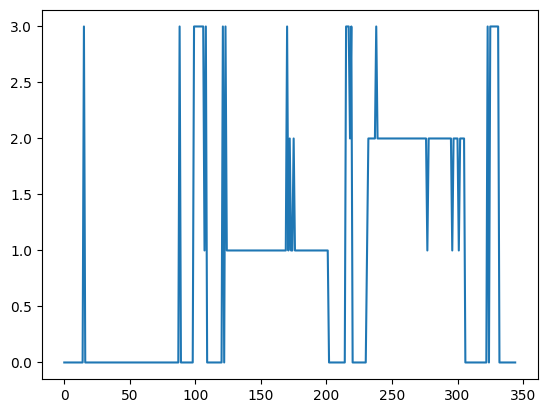

In [50]:
# Test the new CNN model on the sequence 1
# load the unseen sequence 1: which is full recording for one welding trial
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/sequenceTest_RefC2_230906"
image_ds = load_and_preprocess_images(directory, image_size=(100, 50), batch_size=32, image_channels=1)
# Apply the normalization to the dataset
normalized_image_ds = image_ds.map(lambda x: normalization_layer(x))
# Predict using the model
predictions = cnn_model_v2.predict(normalized_image_ds)

# If your model outputs class probabilities, you might want to convert these to class labels
predicted_classes = tf.argmax(predictions, axis=1)
print(predicted_classes)
import matplotlib.pyplot as plt
plt.plot(predicted_classes)

11/11 [==============================] - 0s 24ms/step
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0
 3 3 3 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 3 2 2 3 3 2 2 3 3 3 3 1 3 2 2 2 3
 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 1 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 2 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 3 3 0 0
 0 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 3 0 3 3 0 0 3 3 3 3 3 3
 3], shape=(334,), dtype=int64)


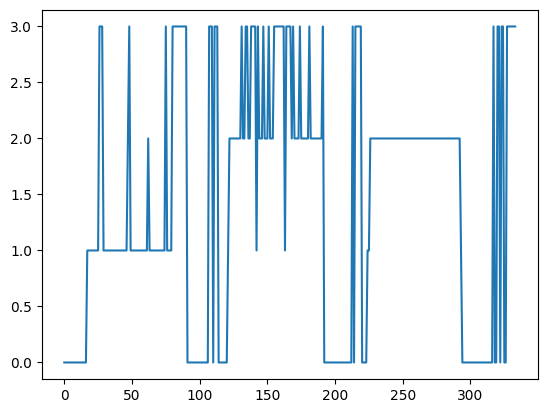

In [51]:
# Test the new CNN model on the sequence 1
# load the unseen sequence 1: which is full recording for one welding trial
directory = "/mnt/d/HV-filesync/yonmi/Desktop/courses/deep learning/sequenceTest_C_230908_1125"
image_ds = load_and_preprocess_images(directory, image_size=(100, 50), batch_size=32, image_channels=1)
# Apply the normalization to the dataset
normalized_image_ds = image_ds.map(lambda x: normalization_layer(x))
# Predict using the model
predictions = cnn_model_v2.predict(normalized_image_ds)

# If your model outputs class probabilities, you might want to convert these to class labels
predicted_classes = tf.argmax(predictions, axis=1)
print(predicted_classes)
import matplotlib.pyplot as plt
plt.plot(predicted_classes)

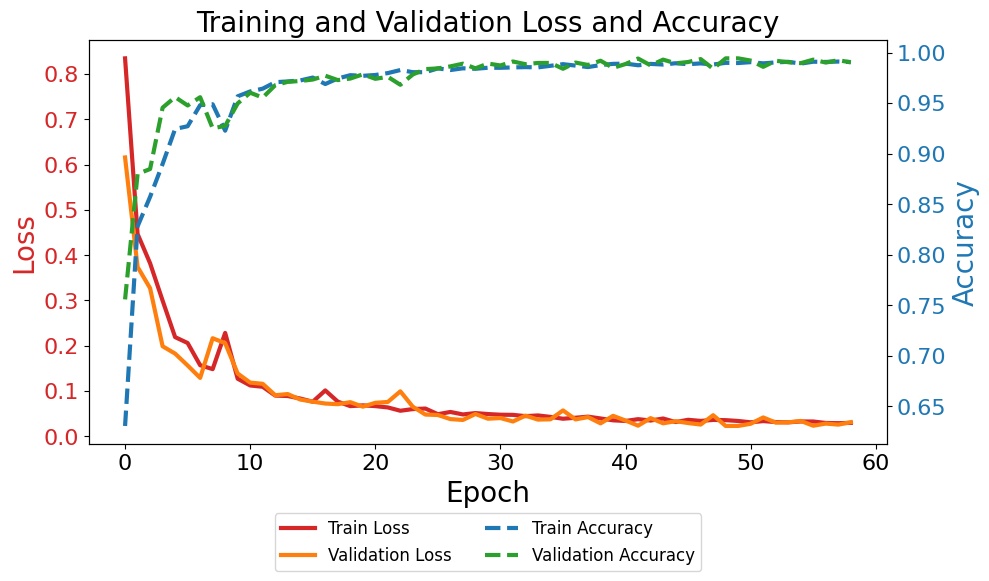

In [54]:
import pandas as pd

# Convert the history dictionary to a pandas DataFrame
history_df = pd.DataFrame(history_cnn_v2.history)

# Save the DataFrame to a CSV file
history_df.to_csv('history_CNN_V2.csv', index=False)
plot_training_history(history_cnn_v2)

In [55]:
cnn_model_v2.save('cnn_model_v2.keras')